In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
sample_heart = pd.read_csv(r"heart_2022_with_nans.csv")
print(sample_heart)

                 State     Sex GeneralHealth  PhysicalHealthDays  \
0              Alabama  Female     Very good                 0.0   
1              Alabama  Female     Excellent                 0.0   
2              Alabama  Female     Very good                 2.0   
3              Alabama  Female     Excellent                 0.0   
4              Alabama  Female          Fair                 2.0   
...                ...     ...           ...                 ...   
445127  Virgin Islands  Female          Good                 0.0   
445128  Virgin Islands  Female     Excellent                 2.0   
445129  Virgin Islands  Female          Poor                30.0   
445130  Virgin Islands    Male     Very good                 0.0   
445131  Virgin Islands    Male     Very good                 0.0   

        MentalHealthDays                                    LastCheckupTime  \
0                    0.0  Within past year (anytime less than 12 months ...   
1                    0.0 

In [2]:
sample_heart.shape

(445132, 40)

In [3]:
heart = sample_heart.sample(frac=0.05)

In [4]:
heart.shape

(22257, 40)

In [5]:
heart.describe()

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
count,21714.000000,21802.000000,22000.000000,20835.000000,20213.000000,19851.000000
mean,4.319287,4.350381,7.027545,1.702771,83.057799,28.528374
std,8.656548,8.377072,1.512217,0.107369,21.482574,6.573536
min,0.000000,0.000000,1.000000,0.910000,22.680000,12.020000
25%,0.000000,0.000000,6.000000,1.630000,68.040000,24.130000
50%,0.000000,0.000000,7.000000,1.700000,80.000000,27.410000
75%,3.000000,4.000000,8.000000,1.780000,95.250000,31.750000
max,30.000000,30.000000,24.000000,2.210000,254.010000,89.970000


In [6]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22257 entries, 370310 to 213280
Data columns (total 40 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   State                      22257 non-null  object 
 1   Sex                        22257 non-null  object 
 2   GeneralHealth              22197 non-null  object 
 3   PhysicalHealthDays         21714 non-null  float64
 4   MentalHealthDays           21802 non-null  float64
 5   LastCheckupTime            21831 non-null  object 
 6   PhysicalActivities         22198 non-null  object 
 7   SleepHours                 22000 non-null  float64
 8   RemovedTeeth               21682 non-null  object 
 9   HadHeartAttack             22102 non-null  object 
 10  HadAngina                  22047 non-null  object 
 11  HadStroke                  22169 non-null  object 
 12  HadAsthma                  22170 non-null  object 
 13  HadSkinCancer              22095 non-null  ob

In [8]:
heart. drop_duplicates(inplace=True)

In [9]:
heart.duplicated().sum()

0

In [10]:
heart.isnull()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
370310,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
94556,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
357850,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
77270,False,False,False,False,False,False,False,False,False,False,...,True,False,True,False,False,False,False,False,False,False
228770,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163720,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
215841,False,False,False,False,False,False,False,True,False,False,...,False,False,False,True,True,True,True,True,True,True
385042,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
324262,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [11]:
heart.isnull().any()

State                        False
Sex                          False
GeneralHealth                 True
PhysicalHealthDays            True
MentalHealthDays              True
LastCheckupTime               True
PhysicalActivities            True
SleepHours                    True
RemovedTeeth                  True
HadHeartAttack                True
HadAngina                     True
HadStroke                     True
HadAsthma                     True
HadSkinCancer                 True
HadCOPD                       True
HadDepressiveDisorder         True
HadKidneyDisease              True
HadArthritis                  True
HadDiabetes                   True
DeafOrHardOfHearing           True
BlindOrVisionDifficulty       True
DifficultyConcentrating       True
DifficultyWalking             True
DifficultyDressingBathing     True
DifficultyErrands             True
SmokerStatus                  True
ECigaretteUsage               True
ChestScan                     True
RaceEthnicityCategor

In [12]:
heart.isnull().sum()

State                           0
Sex                             0
GeneralHealth                  60
PhysicalHealthDays            543
MentalHealthDays              455
LastCheckupTime               426
PhysicalActivities             59
SleepHours                    257
RemovedTeeth                  575
HadHeartAttack                155
HadAngina                     210
HadStroke                      88
HadAsthma                      87
HadSkinCancer                 162
HadCOPD                       106
HadDepressiveDisorder         144
HadKidneyDisease               94
HadArthritis                  123
HadDiabetes                    61
DeafOrHardOfHearing          1008
BlindOrVisionDifficulty      1061
DifficultyConcentrating      1209
DifficultyWalking            1208
DifficultyDressingBathing    1178
DifficultyErrands            1273
SmokerStatus                 1754
ECigaretteUsage              1731
ChestScan                    2747
RaceEthnicityCategory         672
AgeCategory   

In [13]:
round(heart.isnull().mean() * 100,1)

State                         0.0
Sex                           0.0
GeneralHealth                 0.3
PhysicalHealthDays            2.4
MentalHealthDays              2.0
LastCheckupTime               1.9
PhysicalActivities            0.3
SleepHours                    1.2
RemovedTeeth                  2.6
HadHeartAttack                0.7
HadAngina                     0.9
HadStroke                     0.4
HadAsthma                     0.4
HadSkinCancer                 0.7
HadCOPD                       0.5
HadDepressiveDisorder         0.6
HadKidneyDisease              0.4
HadArthritis                  0.6
HadDiabetes                   0.3
DeafOrHardOfHearing           4.5
BlindOrVisionDifficulty       4.8
DifficultyConcentrating       5.4
DifficultyWalking             5.4
DifficultyDressingBathing     5.3
DifficultyErrands             5.7
SmokerStatus                  7.9
ECigaretteUsage               7.8
ChestScan                    12.3
RaceEthnicityCategory         3.0
AgeCategory   

In [14]:
heart.dropna(how="all")

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
370310,Vermont,Male,Good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,8.0,1 to 5,No,...,1.80,81.65,25.10,Yes,Yes,Yes,No,"Yes, received Tdap",No,No
94556,Idaho,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,1 to 5,No,...,1.73,87.54,29.35,Yes,No,No,Yes,NaN,No,No
357850,Texas,Female,Good,15.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,1 to 5,No,...,1.63,97.98,37.08,No,Yes,Yes,Yes,"Yes, received tetanus shot, but not Tdap",No,No
77270,Georgia,Male,Excellent,0.0,1.0,Within past year (anytime less than 12 months ...,No,8.0,None of them,No,...,NaN,83.91,NaN,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
228770,Nebraska,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,8.0,1 to 5,No,...,1.83,92.99,27.80,Yes,No,No,No,"No, did not receive any tetanus shot in the pa...",No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163720,Maryland,Male,Fair,10.0,5.0,Within past year (anytime less than 12 months ...,Yes,8.0,None of them,No,...,1.80,79.38,24.41,Yes,Yes,Yes,No,"Yes, received Tdap",No,Yes
215841,Missouri,Female,Good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,NaN,None of them,No,...,1.73,68.04,22.81,NaN,NaN,NaN,NaN,NaN,NaN,NaN
385042,Virginia,Male,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,1 to 5,No,...,1.96,113.40,29.65,Yes,No,No,Yes,"Yes, received Tdap",No,Yes
324262,South Carolina,Male,Good,7.0,0.0,Within past year (anytime less than 12 months ...,No,6.0,1 to 5,No,...,1.68,70.31,25.02,No,Yes,No,Yes,"Yes, received tetanus shot, but not Tdap",No,No


In [15]:
heart.dropna()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
370310,Vermont,Male,Good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,8.0,1 to 5,No,...,1.80,81.65,25.10,Yes,Yes,Yes,No,"Yes, received Tdap",No,No
357850,Texas,Female,Good,15.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,1 to 5,No,...,1.63,97.98,37.08,No,Yes,Yes,Yes,"Yes, received tetanus shot, but not Tdap",No,No
228770,Nebraska,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,8.0,1 to 5,No,...,1.83,92.99,27.80,Yes,No,No,No,"No, did not receive any tetanus shot in the pa...",No,Yes
185810,Michigan,Male,Good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,"6 or more, but not all",No,...,1.83,142.88,42.72,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
175572,Massachusetts,Female,Good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,1.52,73.48,31.64,No,Yes,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52763,Connecticut,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,1 to 5,No,...,1.70,70.31,24.28,Yes,Yes,No,No,"No, did not receive any tetanus shot in the pa...",No,Yes
258550,New York,Female,Fair,30.0,3.0,Within past year (anytime less than 12 months ...,Yes,6.0,All,Yes,...,1.63,79.38,30.04,No,Yes,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No
163720,Maryland,Male,Fair,10.0,5.0,Within past year (anytime less than 12 months ...,Yes,8.0,None of them,No,...,1.80,79.38,24.41,Yes,Yes,Yes,No,"Yes, received Tdap",No,Yes
385042,Virginia,Male,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,1 to 5,No,...,1.96,113.40,29.65,Yes,No,No,Yes,"Yes, received Tdap",No,Yes


In [16]:
heart.dropna(subset=['GeneralHealth','PhysicalHealthDays','MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities','SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory','HeightInMeters','WeightInKilograms','BMI','AlcoholDrinkers','HIVTesting','FluVaxLast12',
                      'PneumoVaxEver','TetanusLast10Tdap','HighRiskLastYear','CovidPos'], inplace=True)

In [17]:
heart.isnull().sum()

State                        0
Sex                          0
GeneralHealth                0
PhysicalHealthDays           0
MentalHealthDays             0
LastCheckupTime              0
PhysicalActivities           0
SleepHours                   0
RemovedTeeth                 0
HadHeartAttack               0
HadAngina                    0
HadStroke                    0
HadAsthma                    0
HadSkinCancer                0
HadCOPD                      0
HadDepressiveDisorder        0
HadKidneyDisease             0
HadArthritis                 0
HadDiabetes                  0
DeafOrHardOfHearing          0
BlindOrVisionDifficulty      0
DifficultyConcentrating      0
DifficultyWalking            0
DifficultyDressingBathing    0
DifficultyErrands            0
SmokerStatus                 0
ECigaretteUsage              0
ChestScan                    0
RaceEthnicityCategory        0
AgeCategory                  0
HeightInMeters               0
WeightInKilograms            0
BMI     

In [18]:
from sklearn.preprocessing import LabelEncoder
columns_to_convert = ['State', 'Sex', 'GeneralHealth'
                      , 'LastCheckupTime', 'PhysicalActivities', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory','AlcoholDrinkers','HIVTesting','FluVaxLast12',
                      'PneumoVaxEver','TetanusLast10Tdap','HighRiskLastYear','CovidPos']

label_encoder = LabelEncoder()
for col in columns_to_convert:
    if heart[col].dtype == 'object': heart[col] = label_encoder.fit_transform(heart[col])

In [19]:
heart.shape

(12326, 40)

In [20]:
heart["HadHeartAttack"].unique()


array([0, 1])

In [21]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12326 entries, 370310 to 324262
Data columns (total 40 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   State                      12326 non-null  int32  
 1   Sex                        12326 non-null  int32  
 2   GeneralHealth              12326 non-null  int32  
 3   PhysicalHealthDays         12326 non-null  float64
 4   MentalHealthDays           12326 non-null  float64
 5   LastCheckupTime            12326 non-null  int32  
 6   PhysicalActivities         12326 non-null  int32  
 7   SleepHours                 12326 non-null  float64
 8   RemovedTeeth               12326 non-null  int32  
 9   HadHeartAttack             12326 non-null  int32  
 10  HadAngina                  12326 non-null  int32  
 11  HadStroke                  12326 non-null  int32  
 12  HadAsthma                  12326 non-null  int32  
 13  HadSkinCancer              12326 non-null  in

In [22]:
heart['HadHeartAttack'].value_counts(normalize=True)

HadHeartAttack
0    0.944589
1    0.055411
Name: proportion, dtype: float64

In [23]:
heart.shape

(12326, 40)

HadHeartAttack
0    11643
1      683
Name: count, dtype: int64


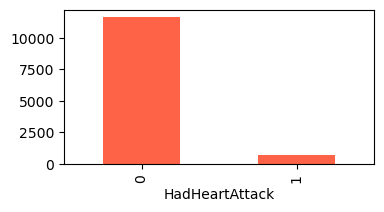

'\nInference: \nHere from the above visualization it is clearly visible that our dataset is completely imbalanced, in fact, the number of patients who had a heart attack is half of the patients who did not.\n'

In [24]:
import matplotlib.pyplot as plt

# Define colors for each category
color_wheel = {0: "#ff6347", 1: "#4287f5"}

# Map colors to the "HadHeartAttack" column
colors = heart["HadHeartAttack"].map(lambda x: color_wheel.get(x, "#000000"))  # Use black color for unknown categories

# Print the count of each unique value in the "HadHeartAttack" column
print(heart.HadHeartAttack.value_counts())

# Plot the bar chart with specified colors
plt.figure(figsize=(4, 2))  # Adjust the figure size as needed
p = heart["HadHeartAttack"].value_counts().plot(kind="bar", color=colors)
plt.show()

'''
Inference: 
Here from the above visualization it is clearly visible that our dataset is completely imbalanced, in fact, the number of patients who had a heart attack is half of the patients who did not.
'''


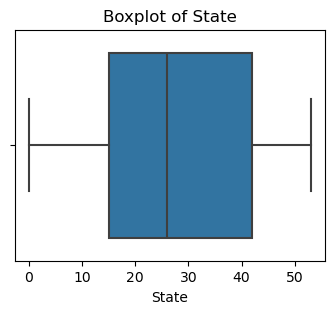

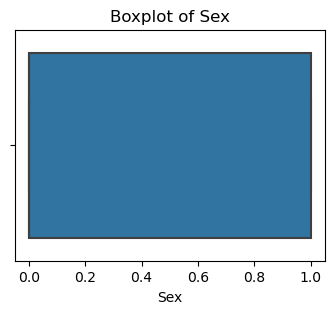

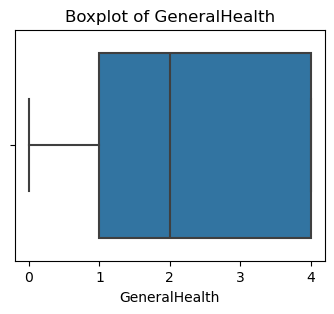

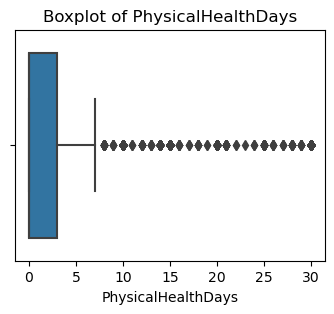

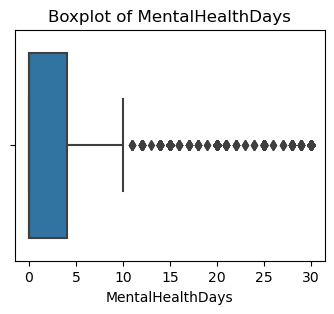

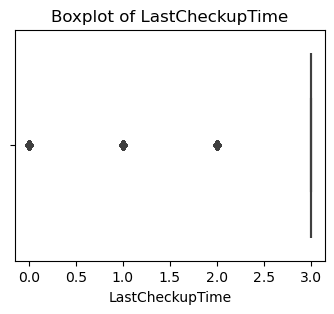

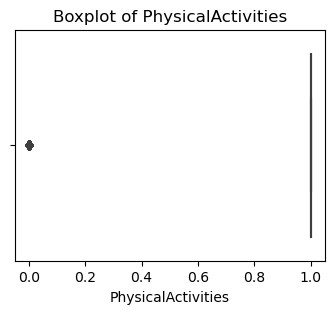

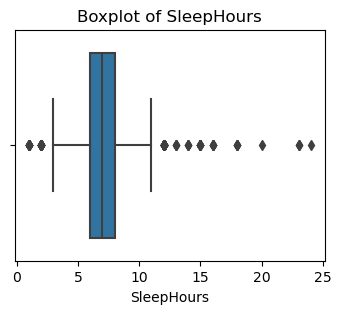

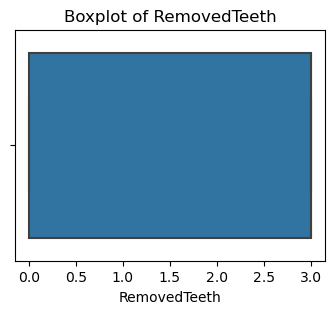

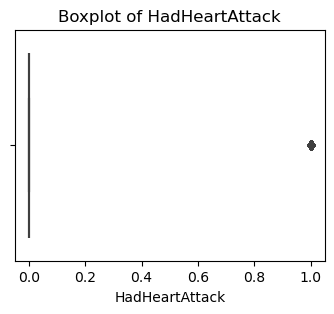

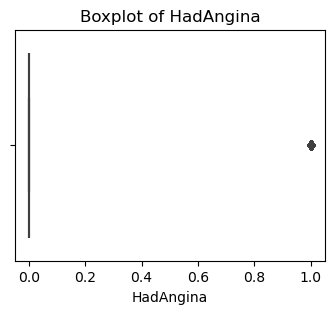

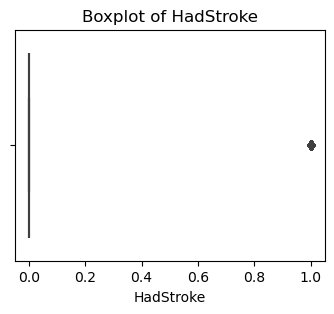

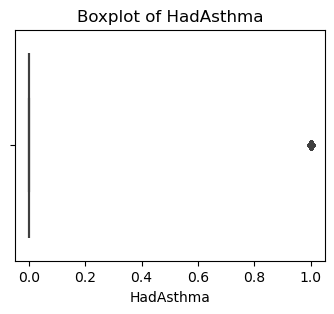

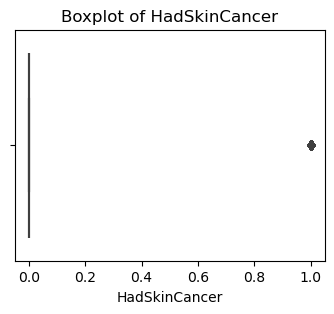

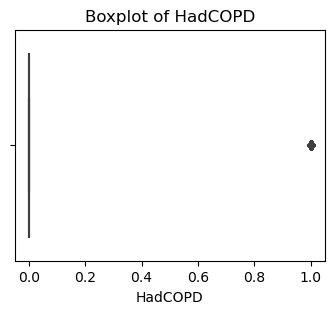

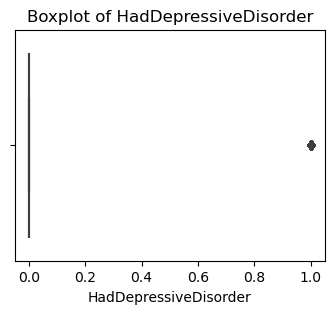

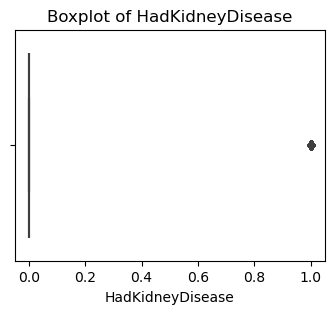

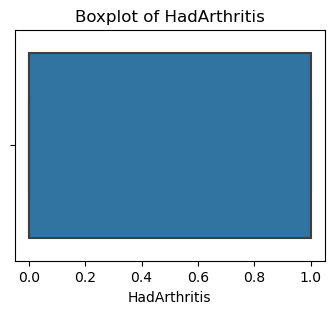

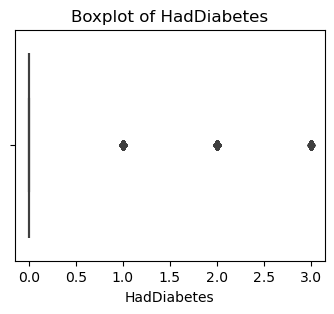

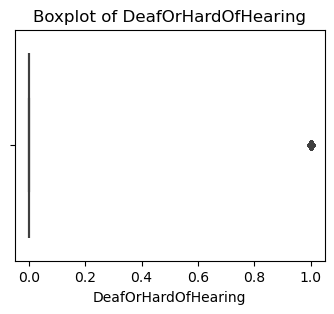

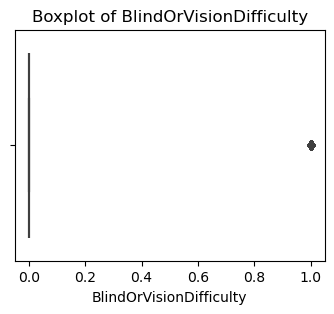

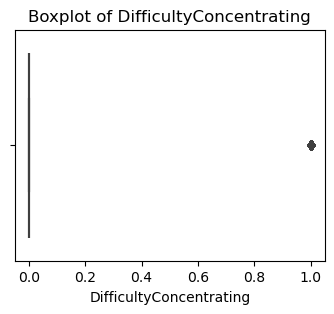

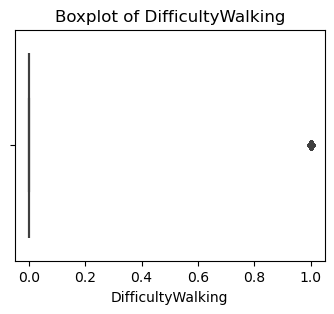

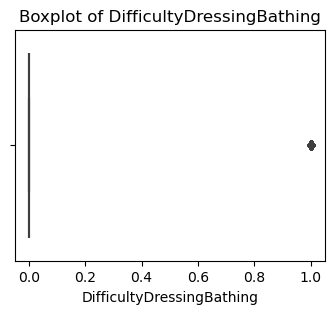

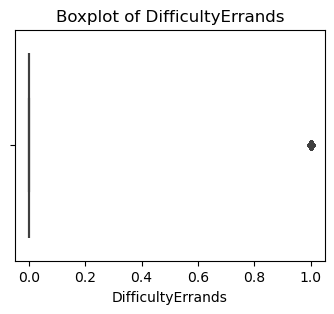

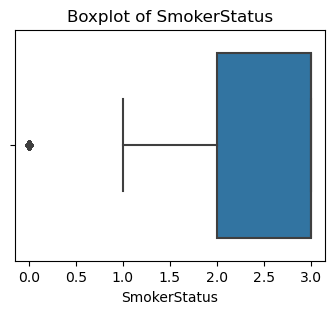

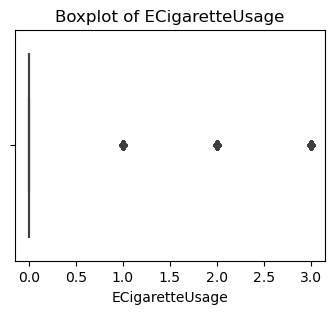

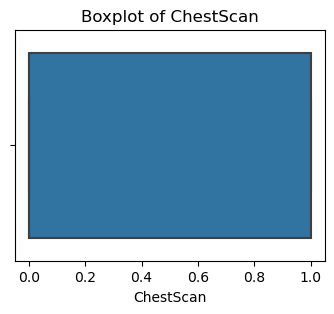

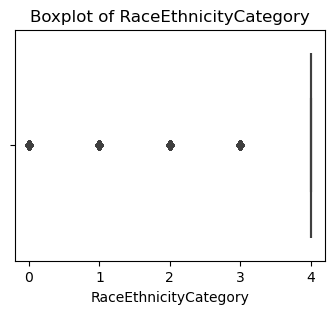

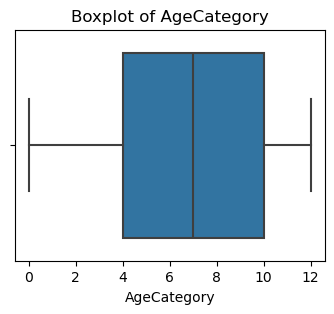

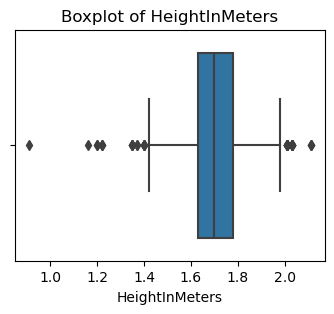

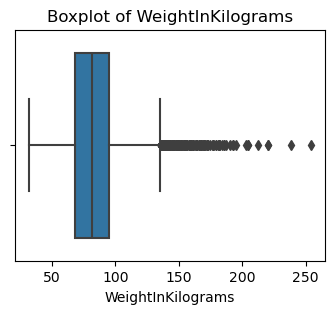

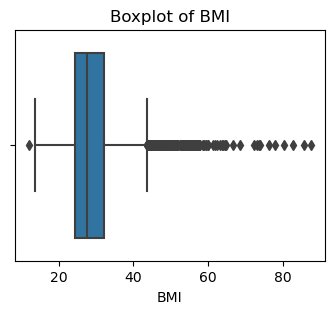

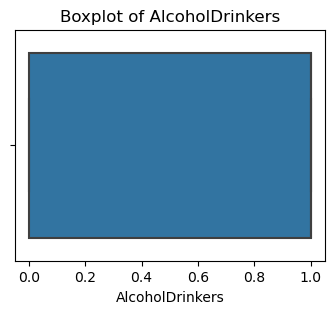

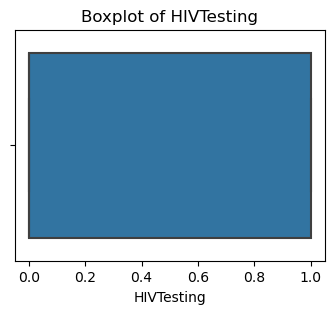

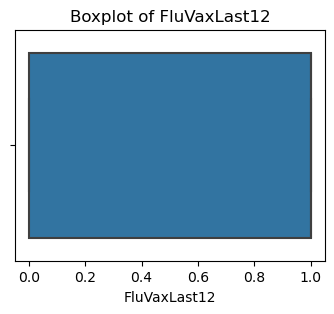

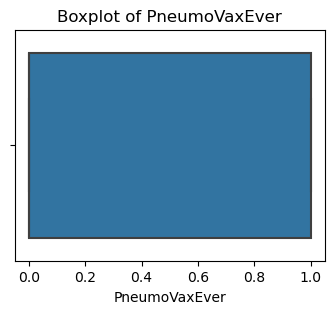

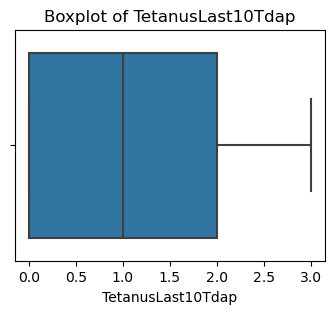

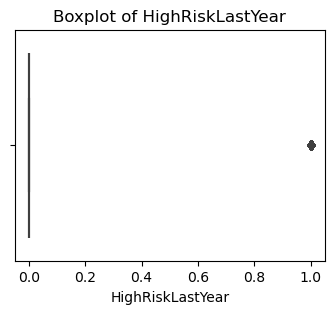

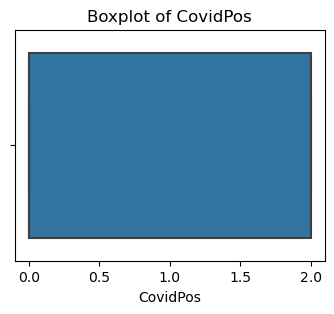

In [25]:
for column in heart.columns:
    # Set the size of the boxplot
    plt.figure(figsize=(4,3))  # Adjust width and height as needed
    
    # Create a boxplot for the current column to visualize outliers
    sns.boxplot(x=heart[column])
    plt.title(f"Boxplot of {column}")
    plt.show()

In [26]:
X = heart.drop('HadHeartAttack', axis=1)
y = heart['HadHeartAttack']

In [28]:
print(X.head())
print(y.head())

        State  Sex  GeneralHealth  PhysicalHealthDays  MentalHealthDays  \
370310     47    1              2                 0.0               0.0   
357850     45    0              2                15.0               0.0   
228770     28    1              4                 0.0               0.0   
185810     23    1              2                 0.0               0.0   
175572     22    0              2                 0.0               0.0   

        LastCheckupTime  PhysicalActivities  SleepHours  RemovedTeeth  \
370310                3                   1         8.0             0   
357850                3                   1         9.0             0   
228770                3                   1         8.0             0   
185810                3                   1         6.0             1   
175572                3                   0         8.0             1   

        HadAngina  ...  HeightInMeters  WeightInKilograms    BMI  \
370310          0  ...            1.80    

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, fbeta_score
from sklearn.metrics import roc_curve, auc

In [32]:
X_train , X_test , y_train ,  y_test = train_test_split(X, y, train_size=0.7 , random_state=42)

In [43]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f2_score = fbeta_score(y_test, y_pred, beta=2)

print("Precision:", precision)
print("Recall:", recall)
print("F2 Score:", f2_score)

Precision: 0.5
Recall: 0.07177033492822966
F2 Score: 0.08660508083140878


In [37]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [38]:
y_pred = logreg.predict(X_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f2_score = fbeta_score(y_test, y_pred, beta=2)

print("Precision:", precision)
print("Recall:", recall)
print("F2 Score:", f2_score)

Precision: 0.5161290322580645
Recall: 0.22966507177033493
F2 Score: 0.25834230355220666


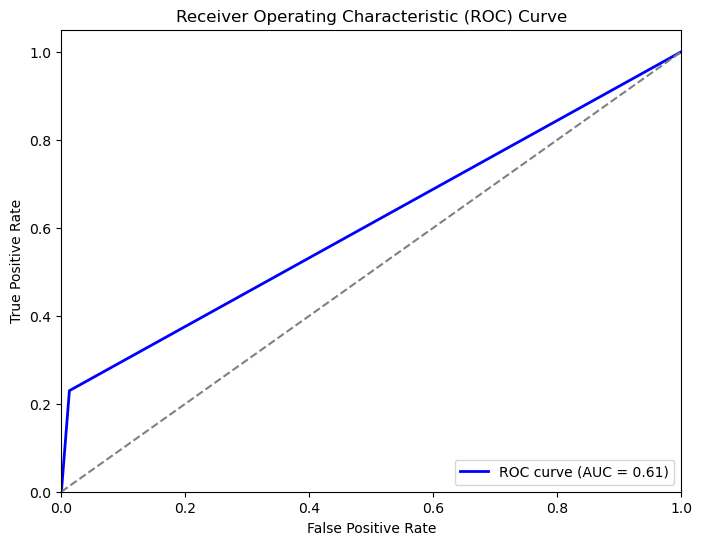

In [39]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [44]:
from sklearn.svm import SVC
svm_clf = SVC(kernel='rbf', random_state=42)
svm_clf.fit(X_train, y_train)

SVC(random_state=42)

In [46]:
y_pred = svm_clf.predict(X_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f2_score = fbeta_score(y_test, y_pred, beta=2)

print("Precision:", precision)
print("Recall:", recall)
print("F2 Score:", f2_score)

Precision: 0.0
Recall: 0.0
F2 Score: 0.0


In [47]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
Decision_predictions = dtree.predict(X_test)
precision = precision_score(y_test, Decision_predictions)
recall = recall_score(y_test, Decision_predictions)
f2_score = fbeta_score(y_test, Decision_predictions, beta=2)

print("Precision:", precision)
print("Recall:", recall)
print("F2 Score:", f2_score)

Precision: 0.27232142857142855
Recall: 0.291866028708134
F2 Score: 0.28773584905660377
